# Problem statement
    
Predict insurance costs.

# Approach
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.



# Import dependancies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [52]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Attributes:

1. age: age of primary beneficiary.


2. sex: insurance contractor gender, female, male.


3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


4. children: Number of children covered by health insurance / Number of dependents.


5. smoker: Smoking.


6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


7. charges: Individual medical costs billed by health insurance.

In [54]:
df.shape

(1338, 7)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Numerical features

In [57]:
num_cols= df.drop(columns= ['sex', 'smoker', 'region'])
num_cols

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [58]:
num_cols.shape

(1338, 4)

In [59]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [60]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Categorical features

In [61]:
cat_cols= df.drop(columns= ['age', 'bmi', 'children', 'charges'])
cat_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [62]:
cat_cols.shape

(1338, 3)

In [63]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [64]:
cat_cols.describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Data cleaning & EDA

In [65]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset has no null values.

In [66]:
#Find duplicate entries.
df.duplicated().sum()

1

In [67]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Age feature

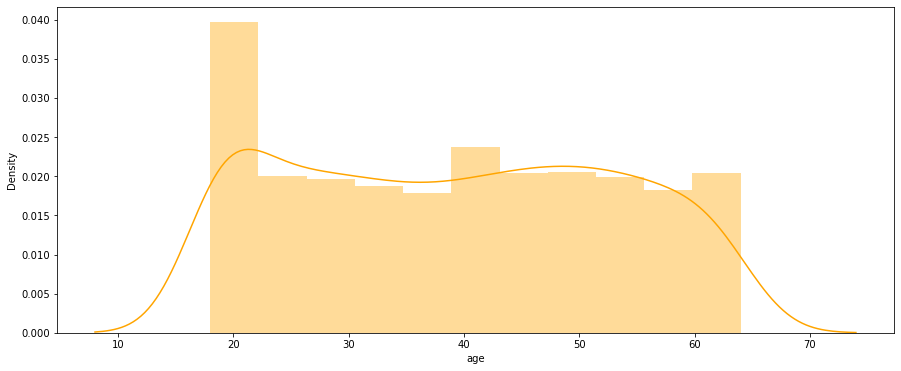

In [70]:
plt.figure(figsize= (15,6))
sns.distplot(df['age'], color= 'orange', kde= True)
plt.show()

# Sex feature

<AxesSubplot:>

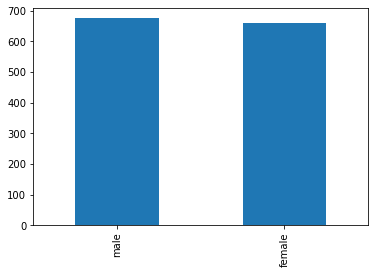

In [71]:
df['sex'].value_counts().plot(kind= 'bar')

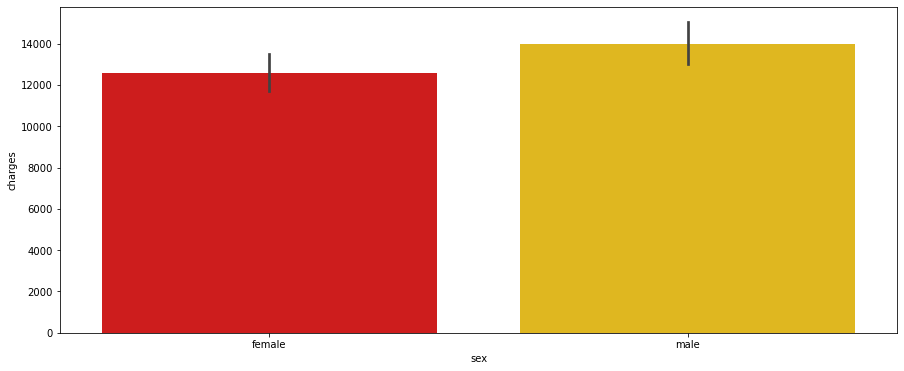

In [72]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'sex', y= 'charges', data= df, palette= 'hot')
plt.show()

# Interpretations:

The barplot of sex v/s charges says that the female applicants are paying around 12,500 where as male applicants are paying 14,000 approx.

# BMI feature

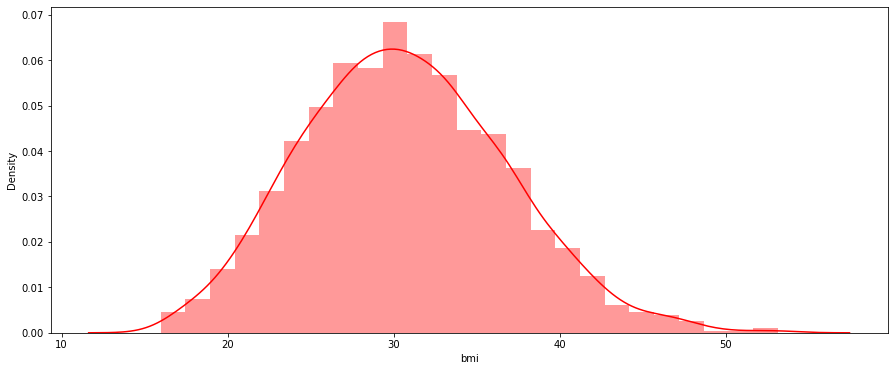

In [73]:
plt.figure(figsize= (15,6))
sns.distplot(df['bmi'], color= 'red', kde= True)
plt.show()

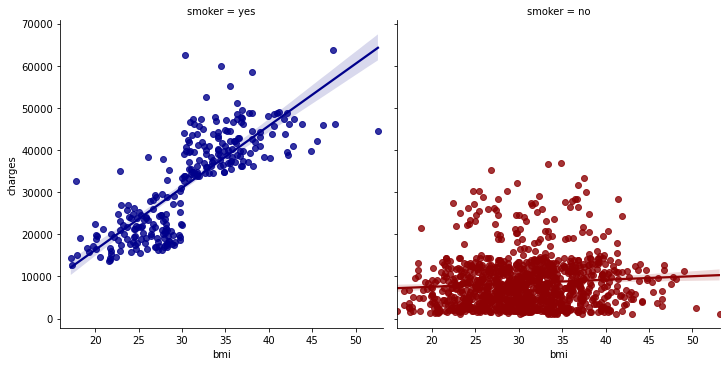

In [74]:
sns.lmplot(x = 'bmi', y ='charges', hue ='smoker', col = 'smoker', data = df, palette=["#00008b", "#8d0103"])
plt.show()

# Interpretations:

1. It looks like bmi and charges do not have a linear relationship for non-smokers.
2. If you are smoking, every increase of 1 unit of bmi increases the possible medical cost by 1473.11 dollars.
3. Note that the correlation coefficient of smokers is around 0.8. This supports our observation earlier that people who are obese and also smoke pays high medical cost.

# Children feature

<AxesSubplot:>

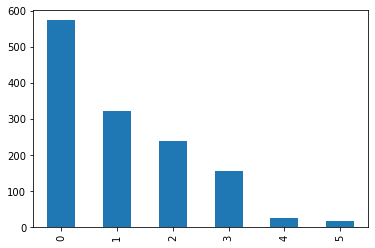

In [75]:
df['children'].value_counts().plot(kind= 'bar')

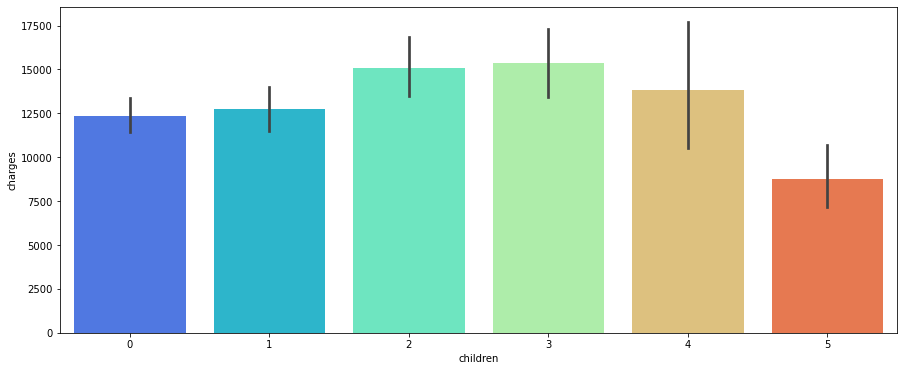

In [76]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'children', y= 'charges', data= df, palette= 'rainbow')
plt.show()

# Interpretations:
    
People who are having kids about 2 to 3 are applying for medical insurance mostly.

# Smoker feature

In [77]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:>

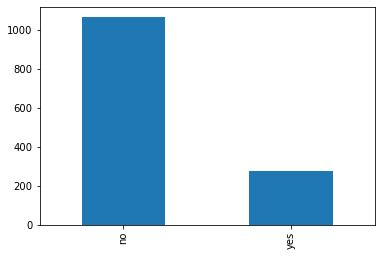

In [78]:
df['smoker'].value_counts().plot(kind= 'bar')

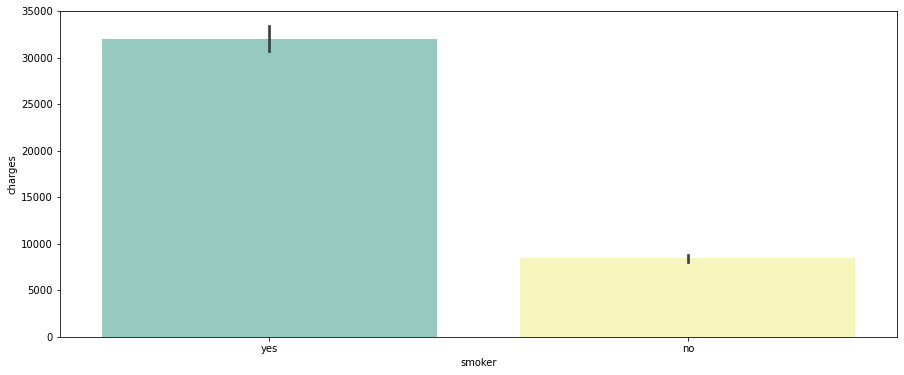

In [79]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'smoker', y= 'charges', data= df, palette= 'Set3')
plt.show()

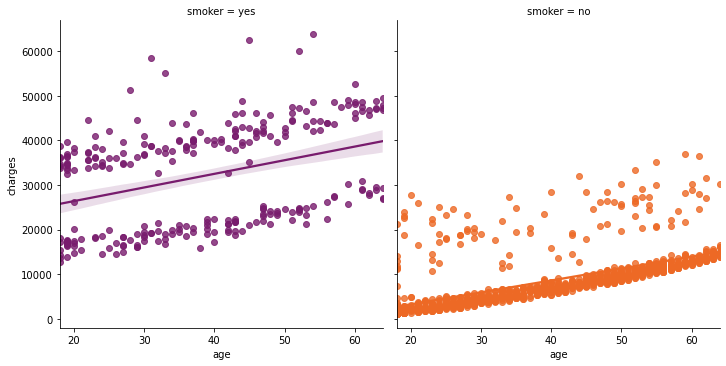

In [80]:
sns.lmplot(x = 'age', y ='charges', hue ='smoker', col = 'smoker', data = df, palette='inferno')
plt.show()

# Interpretations:

1. If you are not smoking, every birthday you have increases the possible medical cost by 267.25 dollars.
2. If you are smoking, every birthday you have increases the possible medical cost by 305.24 dollars.
3. Note that the correlation coefficient of non-smokers are higher than the smokers BUT you pay more if you smoke. The statistic we should care about in this plot is the slope of the line not the correlation coefficient.

# Region feature

In [81]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:>

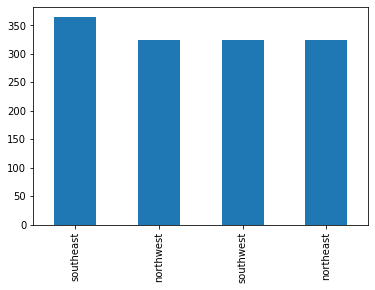

In [82]:
df['region'].value_counts().plot(kind= 'bar')

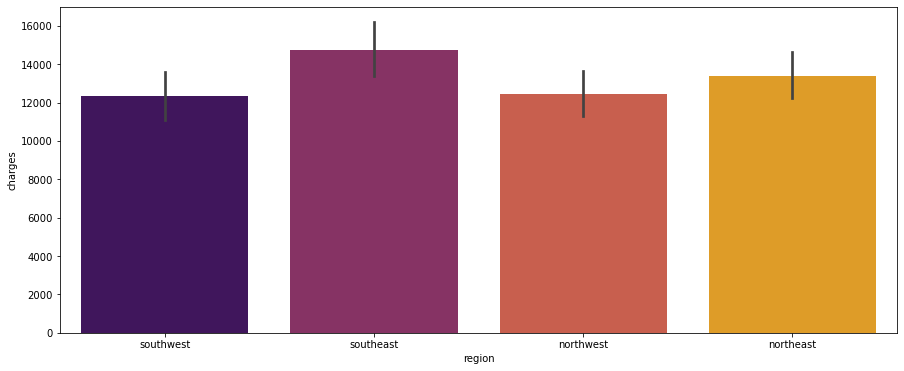

In [83]:
plt.figure(figsize= (15,6))
sns.barplot(x= 'region', y= 'charges', data= df, palette= 'inferno')
plt.show() 

# Interpretations:
There is huge volume of applicants from south-east and north-east. 

# Charges feature

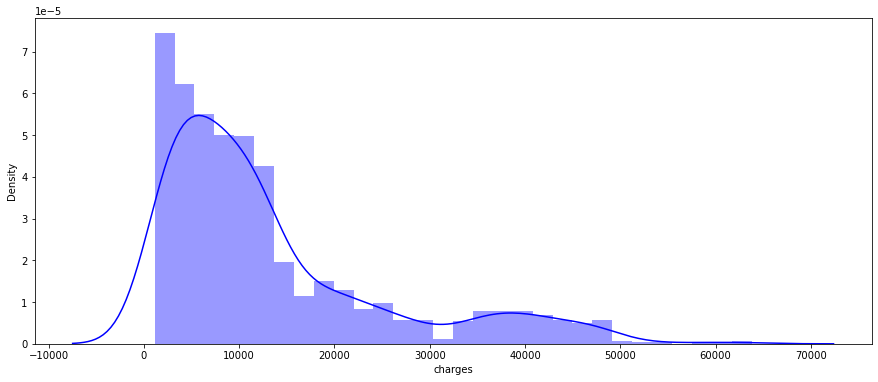

In [84]:
plt.figure(figsize= (15,6))
sns.distplot(df['charges'], color= 'blue', kde= True)
plt.show()

# Interpretations:
Typical charges among applicants are shown in the above plot. The maximum charges are around 50,000 and minimum is less than 10,000.

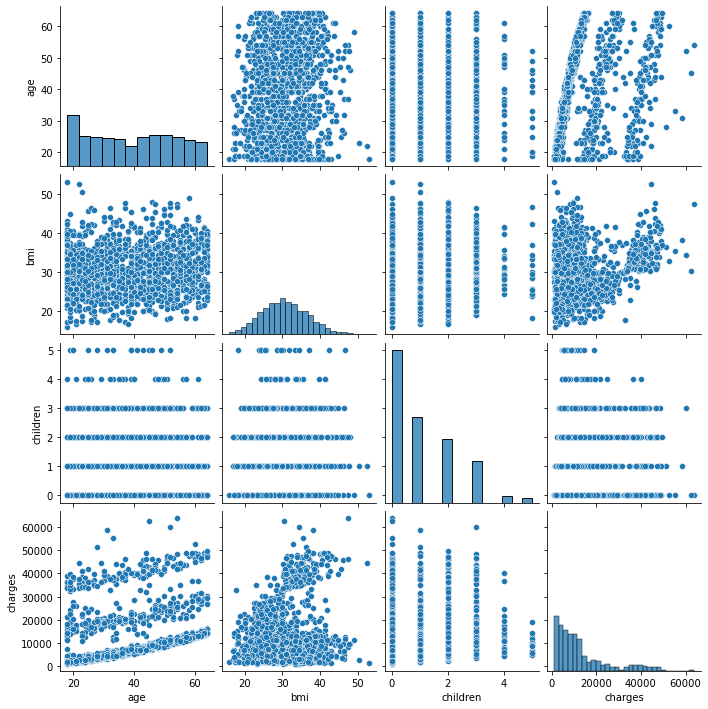

In [85]:
sns.pairplot(data= df)
plt.show()

# Correlation heatmap

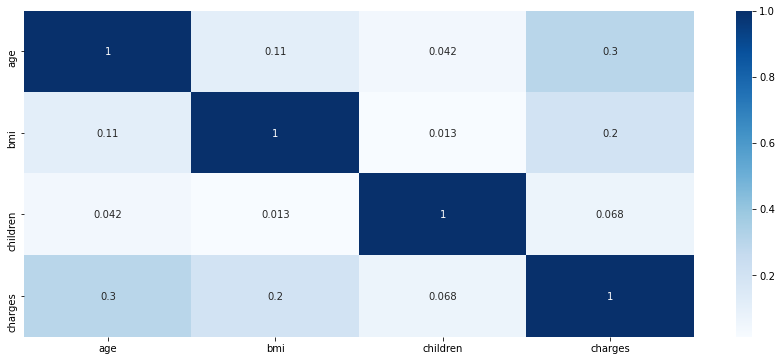

In [86]:
plt.figure(figsize= (15,6))
sns.heatmap(df.corr(), annot= True, cmap= 'Blues')
plt.show()

# Splitting data

In [87]:
X = df.drop(columns=['charges'])
y = df['charges']

In [88]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [89]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Model Building

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [92]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

# Linear Regression

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1, 4, 5])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7356250258364583
MAE 4320.272177867899


# Ridge

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7333399698325281
MAE 4395.8070143411705


# Lasso

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7356250453054347
MAE 4320.2715476307985


# Random Forest

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8361148976146935
MAE 2719.219476187062


# Decesion Tree

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7835779583014564
MAE 2682.292730544067


# Extra Trees

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8171241480363871
MAE 2742.3046949311715


# AdaBoost

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8093765074718329
MAE 4078.252368648304


# Gradient Boost

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8209326640868277
MAE 2962.679140374775


# Conclusion:

1. Linear regression achieved r2 score of 73.56%

2. Ridge model achieved r2 score of 73.33%

3. Lasso model achieved r2 score of 73.56%

4. Random forest model achieved r2 score of 83.61%

5. Decesion tree model achieved r2 score of 78.35%

6. Extra trees model achieved r2 score of 81.71%

7. AdaBoost model achieved r2 score of 80.9%

8. Gradient Boost model achieved r2 score of 82.09%